### Line Chart

- Plot  S&P 500 price on a line chart
    - S&P 500 (^GSPC): data/^GSPC.csv


- color palette: https://color.adobe.com/explore?page=8


- caution:
    - it will take a long time to plot data with more than 5k samples (i.e. rows)
    
- reference:
    1. https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#35.-Time-Series-Plot
    1. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html?highlight=title#matplotlib.pyplot.title
    

In [1]:
import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
from matplotlib.ticker import StrMethodFormatter

In [2]:
print('pandas version: ', pd.__version__)
print('numpy version: ', np.__version__)
print('matplotlib version: ', mpl.__version__)
print('seaborn version: ', sns.__version__)

pandas version:  1.3.4
numpy version:  1.21.4
matplotlib version:  3.5.0
seaborn version:  0.11.2


In [27]:
df_gold=pd.read_csv('data/GC=F.csv', sep='|')

df_sp500=pd.read_csv('data/^GSPC.csv', sep='|')

df_oil=pd.read_csv('data/CL=F.csv', sep='|')

In [28]:
df_gold.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,0,0,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,0,0,0


In [29]:
df_sp500.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1,1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0


In [30]:
#combine data
df=df_gold[['Date', 'Close']].merge(df_sp500[['Date', 'Close']], on=['Date'], how='inner')
df=df.merge(df_oil[['Date', 'Close']], on=['Date'], how='inner')

In [31]:
df.head(2)

,Date,Close_x,Close_y,Close
0,2000-08-30,273.899994,1502.589966,33.400002
1,2000-08-31,278.299988,1517.680054,33.099998


In [38]:
df.columns=['date', 'gold_price','sp500_price', 'oil_price']

df['oil_price']=100*df['oil_price']

In [39]:
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)


In [40]:
df.shape

(5342, 4)

In [41]:
df.head(2)

,date,gold_price,sp500_price,oil_price
0,2000-08-30,273.899994,1502.589966,3340.000153
1,2000-08-31,278.299988,1517.680054,3309.999847


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5342 entries, 0 to 5341
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5342 non-null   datetime64[ns]
 1   gold_price   5342 non-null   float64       
 2   sp500_price  5342 non-null   float64       
 3   oil_price    5342 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 208.7 KB


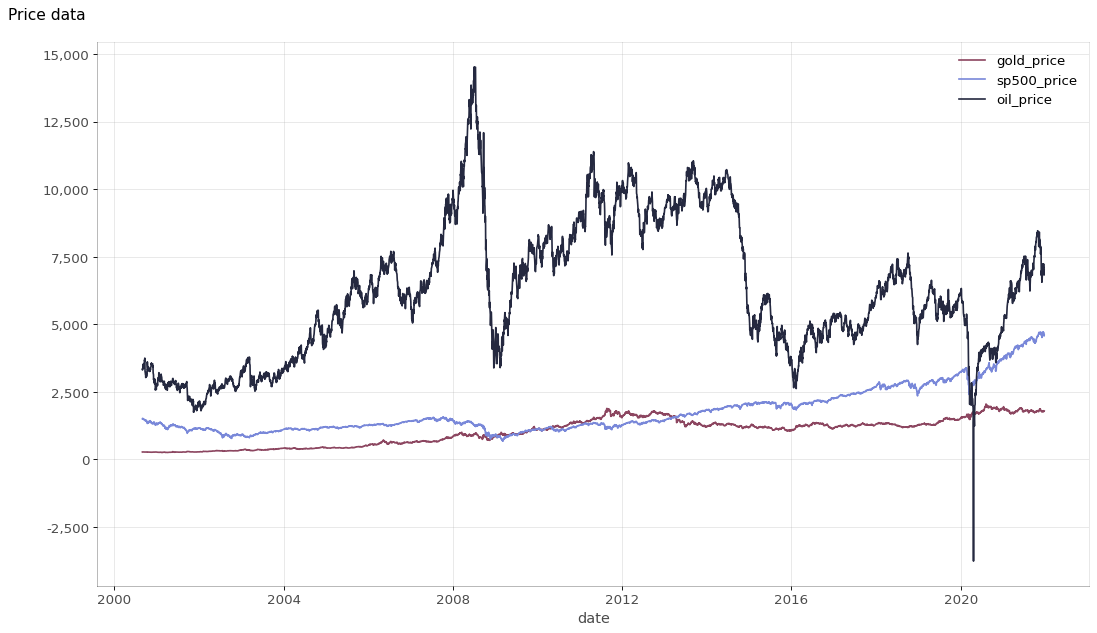

In [43]:
#colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    
colors = ["#8C4660",  "#7988D9", "#252940",  "#54628C", "#F2AEAE"]

fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = df.columns[1:]  
for i, col in enumerate(columns):    
    plt.plot(df.date.values, df[col].values, lw=1.5, color=colors[i], label=col)
    #plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=14, color=mycolors[i])


plt.yticks(fontsize=12, alpha=.7)  
plt.xticks(fontsize=12, alpha=.7)   
#setup x-label, y-label, title
plt.xlabel('date', loc='center', fontsize=13, alpha=.7, y=-0.1)
#plt.ylabel('pnl', rotation=0, fontsize=13, alpha=.7, y=1.01, x=0.1)
plt.title("Price data", fontsize=14, loc='left', y=1.03, x=-0.09)

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# setup grid and borders
plt.grid(axis='both', alpha=.3)
plt.gca().spines["top"].set_alpha(0.1)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.1)    
plt.gca().spines["left"].set_alpha(0.3)   

plt.legend(loc=0, fontsize=12, frameon=False)
plt.show()